<a href="https://colab.research.google.com/github/obeabi/Stats/blob/main/1Way_Anova.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Hands-on Hypothesis Testing Workshop with Python ( One-Way ANOVA)
## Date: 28th April 2023
## Prepared by : Abiola Obembe
## Sponsored by : Analysts HQ

In [17]:
# Install dependcies
!pip install pingouin
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

from scipy.stats import norm, t, mannwhitneyu, fisher_exact, ttest_1samp,ttest_ind
from statsmodels.graphics.mosaicplot import mosaic


import statsmodels.api as sm
from statsmodels.stats.weightstats import ztest
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

from pingouin import  welch_anova, ttest, mwu, wilcoxon,ancova,anova, rm_anova,pairwise,pairwise_ttests,pairwise_tukey,compute_effsize, contingency




plt.rcParams['figure.figsize'] = (10.0, 8.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
%matplotlib inline
print("libraries installed succesfully!")

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
libraries installed succesfully!




## Data Set Information:

This data set consists of three types of entities: (a) the specification of an auto in terms of various characteristics, (b) its assigned insurance risk rating, (c) its normalized losses in use as compared to other cars. The second rating corresponds to the degree to which the auto is more risky than its price indicates. Cars are initially assigned a risk factor symbol associated with its price. Then, if it is more risky (or less), this symbol is adjusted by moving it up (or down) the scale. Actuarians call this process "symboling". A value of +3 indicates that the auto is risky, -3 that it is probably pretty safe.

The third factor is the relative average loss payment per insured vehicle year. This value is normalized for all autos within a particular size classification (two-door small, station wagons, sports/speciality, etc...), and represents the average loss per car per year.

Note: Several of the attributes in the database could be used as a "class" attribute.


Attribute Information:

Attribute: Attribute Range

1. symboling: -3, -2, -1, 0, 1, 2, 3.
2. normalized-losses: continuous from 65 to 256.
3. make:
alfa-romero, audi, bmw, chevrolet, dodge, honda,
isuzu, jaguar, mazda, mercedes-benz, mercury,
mitsubishi, nissan, peugot, plymouth, porsche,
renault, saab, subaru, toyota, volkswagen, volvo

4. fuel-type: diesel, gas.
5. aspiration: std, turbo.
6. num-of-doors: four, two.
7. body-style: hardtop, wagon, sedan, hatchback, convertible.
8. drive-wheels: 4wd, fwd, rwd.
9. engine-location: front, rear.
10. wheel-base: continuous from 86.6 120.9.
11. length: continuous from 141.1 to 208.1.
12. width: continuous from 60.3 to 72.3.
13. height: continuous from 47.8 to 59.8.
14. curb-weight: continuous from 1488 to 4066.
15. engine-type: dohc, dohcv, l, ohc, ohcf, ohcv, rotor.
16. num-of-cylinders: eight, five, four, six, three, twelve, two.
17. engine-size: continuous from 61 to 326.
18. fuel-system: 1bbl, 2bbl, 4bbl, idi, mfi, mpfi, spdi, spfi.
19. bore: continuous from 2.54 to 3.94.
20. stroke: continuous from 2.07 to 4.17.
21. compression-ratio: continuous from 7 to 23.
22. horsepower: continuous from 48 to 288.
23. peak-rpm: continuous from 4150 to 6600.
24. city-mpg: continuous from 13 to 49.
25. highway-mpg: continuous from 16 to 54.
26. price: continuous from 5118 to 45400.

In [31]:
# URL for datasets
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.data'

# Read dataset 
column_headers = ['symboling', 'normalized_losses', 'make', 'fuel_type'\
                  , 'aspiration','num_of_doors','body_style', 'drive_wheels' \
                  , 'engine_location', 'wheel_base', 'length', 'width'\
                  , 'height', 'curb_weight', 'engine_type', 'num_of_cylinders'\
                  , 'engine_size', 'fuel_system', 'bore', 'stroke', 'compression_ratio' \
                  , 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
df = pd.read_csv(url , delimiter= ',',encoding = 'utf_8_sig', engine= 'python' ,names= column_headers )

df.head()

,symboling,normalized_losses,make,fuel_type,aspiration,num_of_doors,body_style,drive_wheels,engine_location,wheel_base,...,engine_size,fuel_system,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450


In [19]:
## Drop missing values in dataset for price
# Replace '?' with null values
df.replace('?', np.nan, inplace= True)
df.dropna(subset = ['price'],  inplace= True)
df.reset_index(drop = True, inplace = True)
df.isna().sum()

symboling             0
normalized_losses    37
make                  0
fuel_type             0
aspiration            0
num_of_doors          2
body_style            0
drive_wheels          0
engine_location       0
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_type           0
num_of_cylinders      0
engine_size           0
fuel_system           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64

In [20]:
# Change fields to appropriate datatype

df[['bore', 'price', 'stroke', 'horsepower', 'peak_rpm', 'normalized_losses' ]] = \
    df[['bore', 'price', 'stroke', 'horsepower', 'peak_rpm' , 'normalized_losses']].astype('float')


# Replace missing values in normalized losses, bore, stroke, horsepower,and peak_rpm column with FF
df['normalized_losses'] = df['normalized_losses'].fillna(df.normalized_losses.mean())
df['bore'] = df['bore'].fillna(df.bore.mean())
df['stroke'] = df['stroke'].fillna(df.stroke.mean())
df['peak_rpm'] = df['peak_rpm'].fillna(df.peak_rpm.mean())
df['horsepower'] = df['horsepower'].fillna(df.horsepower.mean())

# Replace missing values in numbr of doors with mode
df['num_of_doors'] = df['num_of_doors'].fillna(df.num_of_doors.mode().iloc[0])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 201 entries, 0 to 200
Data columns (total 26 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   symboling          201 non-null    int64  
 1   normalized_losses  201 non-null    float64
 2   make               201 non-null    object 
 3   fuel_type          201 non-null    object 
 4   aspiration         201 non-null    object 
 5   num_of_doors       201 non-null    object 
 6   body_style         201 non-null    object 
 7   drive_wheels       201 non-null    object 
 8   engine_location    201 non-null    object 
 9   wheel_base         201 non-null    float64
 10  length             201 non-null    float64
 11  width              201 non-null    float64
 12  height             201 non-null    float64
 13  curb_weight        201 non-null    int64  
 14  engine_type        201 non-null    object 
 15  num_of_cylinders   201 non-null    object 
 16  engine_size        201 non

In [21]:
## Dataset statistc summary
df.describe()

,symboling,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.00000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.840796,122.00000,98.797015,174.200995,65.889055,53.766667,2555.666667,126.875622,3.330711,3.256904,10.164279,103.396985,5117.587940,25.179104,30.686567,13207.129353
std,1.254802,31.99625,6.066366,12.322175,2.101471,2.447822,517.296727,41.546834,0.268072,0.316048,4.004965,37.365602,478.113178,6.423220,6.815150,7947.066342
min,-2.000000,65.00000,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,0.000000,101.00000,94.500000,166.800000,64.100000,52.000000,2169.000000,98.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7775.000000
50%,1.000000,122.00000,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5117.587940,24.000000,30.000000,10295.000000
75%,2.000000,137.00000,102.400000,183.500000,66.600000,55.500000,2926.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16500.000000
max,3.000000,256.00000,120.900000,208.100000,72.000000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,262.000000,6600.000000,49.000000,54.000000,45400.000000


In [22]:
# Extract numericaland categorical columns
num_cols = []
categorical_cols = []

for i in df.columns:
  if (df.loc[:,i].dtype == 'int64')  or (df.loc[:,i].dtype == 'float64'):
    num_cols.append(i)
  else:
    categorical_cols.append(i)

print(num_cols)


['symboling', 'normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']


In [23]:
# How many distinct groups do we have in our categorical columns
for i in categorical_cols:
  print('\nThe number of groups in ', i + ' is :')
  print(df.loc[:,i].nunique())
  print('Distinct values in', i, df.loc[:,i].unique())


The number of groups in  make is :
22
Distinct values in make ['alfa-romero' 'audi' 'bmw' 'chevrolet' 'dodge' 'honda' 'isuzu' 'jaguar'
 'mazda' 'mercedes-benz' 'mercury' 'mitsubishi' 'nissan' 'peugot'
 'plymouth' 'porsche' 'renault' 'saab' 'subaru' 'toyota' 'volkswagen'
 'volvo']

The number of groups in  fuel_type is :
2
Distinct values in fuel_type ['gas' 'diesel']

The number of groups in  aspiration is :
2
Distinct values in aspiration ['std' 'turbo']

The number of groups in  num_of_doors is :
2
Distinct values in num_of_doors ['two' 'four']

The number of groups in  body_style is :
5
Distinct values in body_style ['convertible' 'hatchback' 'sedan' 'wagon' 'hardtop']

The number of groups in  drive_wheels is :
3
Distinct values in drive_wheels ['rwd' 'fwd' '4wd']

The number of groups in  engine_location is :
2
Distinct values in engine_location ['front' 'rear']

The number of groups in  engine_type is :
6
Distinct values in engine_type ['dohc' 'ohcv' 'ohc' 'l' 'rotor' 'ohcf']

T

## 1-Way ANOVA 

Does drive wheel (i.e. rwd or fwd or 4wd) have an effect on average price of car?

1. - H0: mean price of rwd= mean price of fwd = mean price of 4wd

2. - H1: At least mean price of a pair of drive wheel is not equal

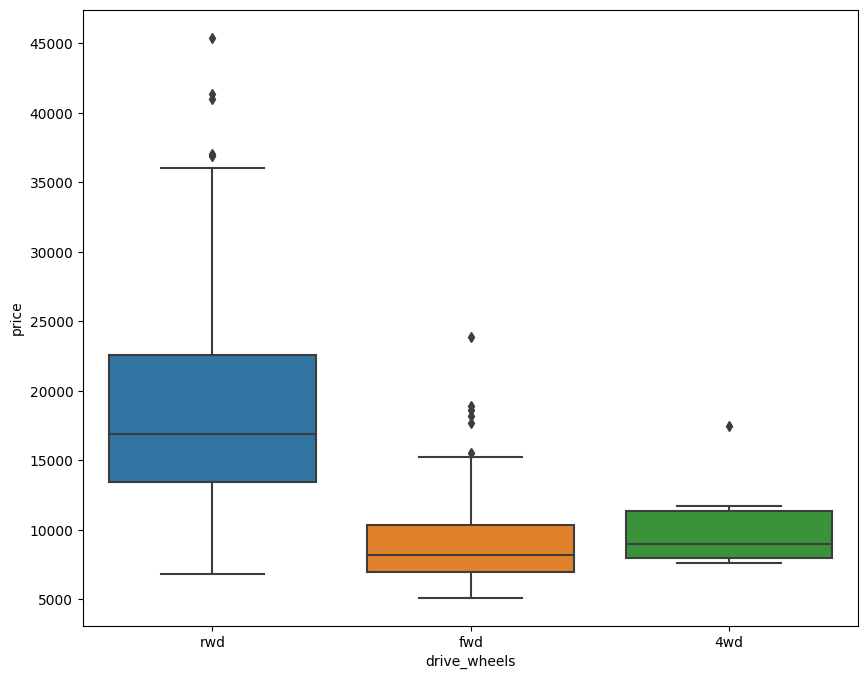

In [24]:
sns.boxplot(x = 'drive_wheels', y = 'price', data = df)
plt.show()

## Using pingouin module

In [25]:
# Perform one-way anova
aov = anova(data = df, dv = 'price', between = 'drive_wheels', detailed= True)
aov.round(3)

,Source,SS,DF,MS,F,p-unc,np2
0,drive_wheels,5.141172e+09,2,2.570586e+09,67.954,0.0,0.407
1,Within,7.490001e+09,198,3.782829e+07,NaN,NaN,NaN


Returns
aovpandas.DataFrame
ANOVA summary:

'Source': Factor names

'SS': Sums of squares

'DF': Degrees of freedom

'MS': Mean squares

'F': F-values

'p-unc': uncorrected p-values

'np2': Partial eta-square effect sizes

In [26]:
# One-way Welch Anova
aov = welch_anova(dv = 'price', between= 'drive_wheels', data = df)
aov.round(3)

,Source,ddof1,ddof2,F,p-unc,np2
0,drive_wheels,2,19.356,44.72,0.0,0.407


From Wikipedia:

It is named for its creator, Bernard Lewis Welch, and is an adaptation of Student’s t-test, and is more reliable when the two samples have unequal variances and/or unequal sample sizes.

The classic ANOVA is very powerful when the groups are normally distributed and have equal variances. However, when the groups have unequal variances, it is best to use the Welch ANOVA that better controls for type I error (Liu 2015). The homogeneity of variances can be measured with the homoscedasticity function. The two other assumptions of normality and independance remain.

In [27]:
# ost hoc analysis tests such Anderson Darling test and tukey test show us the how much the individual means are significantly different from the mean of target variable
pairwise_tukey( data = df, dv= 'price', between = 'drive_wheels')

,A,B,mean(A),mean(B),diff,se,T,p-tukey,hedges
0,4wd,fwd,10241.000000,9244.779661,996.220339,2247.023503,0.443351,0.89739,0.296225
1,4wd,rwd,10241.000000,19757.613333,-9516.613333,2287.556138,-4.160166,0.00014,-1.079374
2,fwd,rwd,9244.779661,19757.613333,-10512.833672,908.270814,-11.574559,0.00000,-1.680699


## Using statsmodel  module

In [28]:
# create ols model
model = ols('price~drive_wheels', data = df).fit()

# perform analysis of varaiance
aov = sm.stats.anova_lm(model , type = 2)

print(aov.round(3))

                 df        sum_sq       mean_sq       F  PR(>F)
drive_wheels    2.0  5.141172e+09  2.570586e+09  67.954     0.0
Residual      198.0  7.490001e+09  3.782829e+07     NaN     NaN


The results means that there is association between drive-wheels and price of car

In [29]:
#  Now that we reject the Ho, we meed to check if the difference due to sampling error?
# i.e. is it honestly significantly different
one_tukey_smm = pairwise_tukeyhsd(groups= df['drive_wheels'], endog= df['price'], alpha = 0.05)
print(one_tukey_smm)

    Multiple Comparison of Means - Tukey HSD, FWER=0.05     
group1 group2  meandiff  p-adj    lower      upper    reject
------------------------------------------------------------
   4wd    fwd  -996.2203 0.8974 -6302.5087   4310.068  False
   4wd    rwd  9516.6133 0.0001  4114.6082 14918.6184   True
   fwd    rwd 10512.8337    0.0  8367.9755 12657.6919   True
------------------------------------------------------------
